In [57]:
df<-read.delim("lista7_zad1.txt",header = F)
dane<-(df$V1)            #próba z rozkładu normalnego N(mi,0.2)
alfa<-0.05               #poziom istotności
sig<-0.2                 #odchylenie standardowe
mu<-1.5                  #hipoteza zerowa H0
n<-1000                  
N<-1000

In [181]:
mu1<-1.51

In [182]:
#obszary krytyczne
z1<-qnorm(1-(alfa/2), 0, 1)    #dla H1: mi1!=1.5  +-
z2<-qnorm(1-alfa, 0, 1)        #dla H1: mi1>mi
z3<-qnorm(alfa, 0, 1)          #dla H1: mi1<mi

# błąd II rodzaju

In [331]:
IIrodzaj<-function(N,n,mu1,mu,sig){ 
#H1: mu1!=1.5
ct1<-0
for(i in 1:N){
    proba<-rnorm(n, mean = mu1, sd = sig)
    Z<-(mean(proba)-mu)/(sig/sqrt(n))         #wartość statystyki tesowej Z
    if( Z<=-z1 || Z>= z1){ct1<-ct1+1}
}
#H1: mu1>mi
ct2<-0
for(i in 1:N){
    proba<-rnorm(n, mean = mu1, sd = sig)
    Z<-(mean(proba)-mu)/(sig/sqrt(n))
    if( Z>=z2){ct2<-ct2+1}
}

#H1: mu1<1.5
ct3<-0
v<-c()
for(i in 1:N){
    proba<-rnorm(n, mean = mu1, sd = sig)
    Z<-(mean(proba)-mu)/(sig/sqrt(n))
    v[i]=Z
    if( Z<=z3){ct3<-ct3+1}
}
values<-data.frame(
    H1=c("nier","wiecej","mniej"),
    val=c(ct1/N,ct2/N,ct3/N))
values
}

In [332]:
alfas<-c(1.47,1.48,1.49,1.51,1.52,1.53)
vec<-data.frame(
    alfa = c(1.47,1.48,1.49,1.51,1.52,1.53),)
for(mu1 in alfas){
    vec<-append(vec,IIrodzaj(N,n,mu1,mu,sig))
}

ERROR: Error in data.frame(alfa = c(1.47, 1.48, 1.49, 1.51, 1.52, 1.53), ): brakuje argumentu, a nie ma określonej wartości domyślnej


In [349]:
IIrodzaj(N,n,1.47,mu,sig)

H1,val
nier,0.998
wiecej,0.000
mniej,0.998


In [347]:
v

$H1
[1] nier   wiecej mniej 
Levels: mniej nier wiecej

$val
[1] 0.882 0.932 0.000

$H1
[1] nier   wiecej mniej 
Levels: mniej nier wiecej

$val
[1] 0.887 0.934 0.000

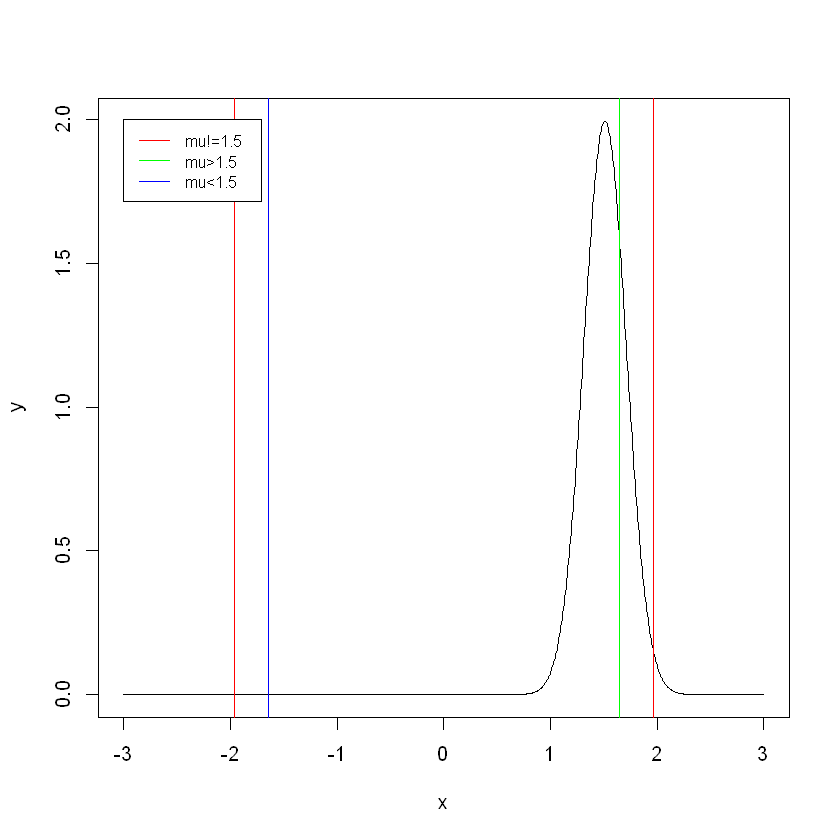

In [187]:
x <- seq(-3, 3, length=1000)
y <- dnorm(x, mean = mu1, sd = sig)
plot(x,y,type = "l")
abline(v=z1,col="red")
abline(v=-z1,col="red")
abline(v=z2,col="green")
abline(v=z3,col="blue")
legend(-3,2, legend = c("mu!=1.5","mu>1.5","mu<1.5"), col = c("red","green","blue"),lty=1, cex=0.8)

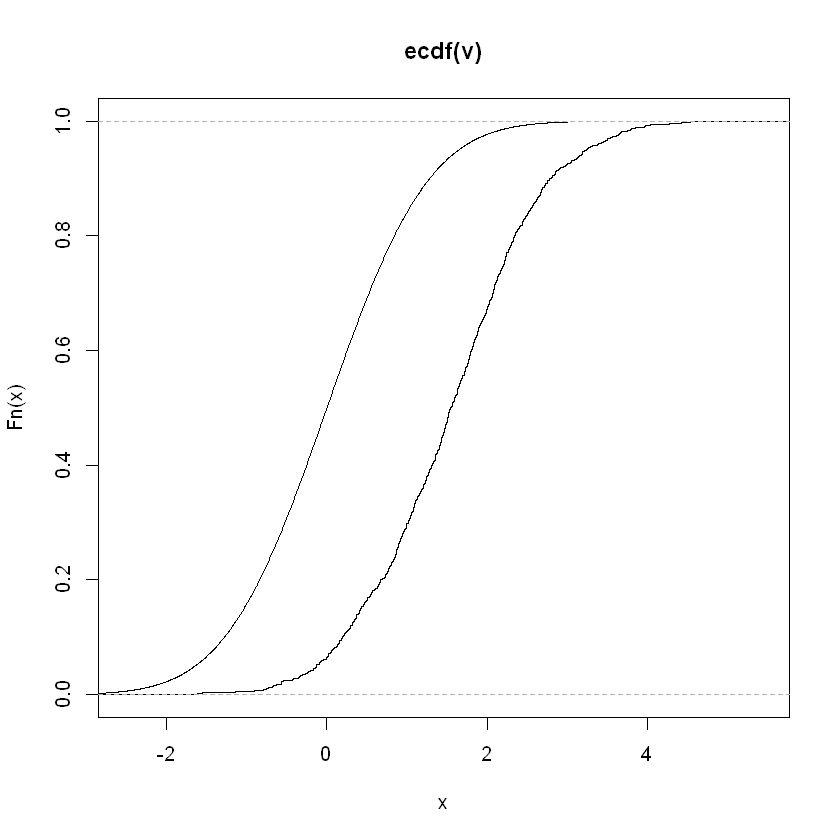

In [190]:
plot(ecdf(v))
lines(x,pnorm(x))